# Alucar - Analisando as vendas

In [2]:
import pandas as pd

In [4]:
alucar = pd.read_csv('data/alucar.csv')

In [5]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [7]:
alucar.shape

(24, 2)

In [8]:
alucar.count()

mes       24
vendas    24
dtype: int64

In [11]:
alucar.isna().sum().sum()

0

In [12]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [13]:
alucar['mes'] = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [14]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [15]:
import seaborn as sns

In [16]:
%matplotlib inline

In [17]:
from matplotlib import pyplot as plt

In [18]:
sns.__version__

'0.11.0'

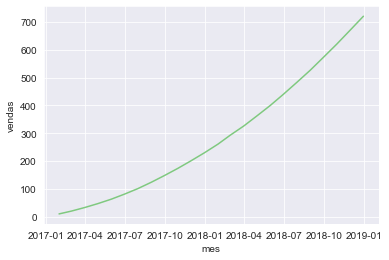

In [24]:
ax = sns.lineplot(x='mes',y='vendas',data=alucar)

Text(0.0, 1.0, 'Vendas Alucar entre 01/2017 e 01/2019')

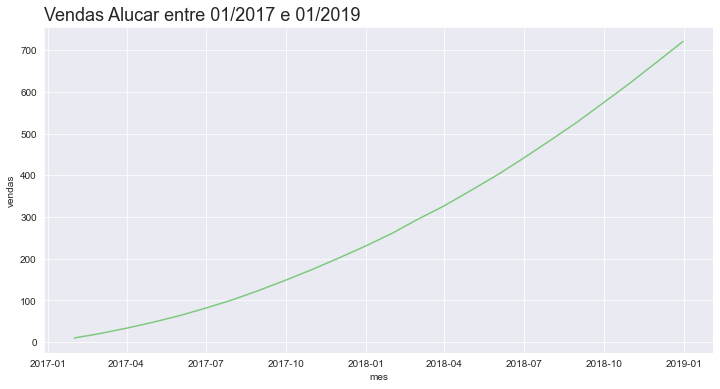

In [32]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)

